## 📌 1. Data Understanding
📒 `1.0-rc-data-understanding.ipynb`

**Objetivo**: entender o conteúdo, a estrutura e a qualidade dos dados.

**Atividades:**
- Analisa a qualidade inicial dos dados
- Verifica valores ausentes, tipos de dados, distribuições
- Identifica valores extremos, inconsistências, duplicatas
- Verifica a estrutura dos dados
- Realiza estatísticas descritivas iniciais (describe, value_counts)



In [35]:
# Carrega Bibliotecas
import pandas as pd
import os
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

# Configura o matplotlib para mostrar gráficos inline
%matplotlib inline

# Setup para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)

## 1. Carrega os dados

In [32]:
# Carrega os dados
df = pd.read_csv('../data/raw/bootcamp_train.csv')

# Visualize o formato do dataframe
print(df.shape)
# Visualiza as primeiras linhas do dataframe
df.head()

(35260, 15)


,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
0,0,L56434,L,298.3,309.1,90.0,1616.0,31.1,195.0,não,False,False,Não,False,Não
1,1,L48741,L,298.2,308.4,90.0,1388.0,53.8,137.0,Não,False,False,Não,False,Não
2,2,L48850,L,298.2,307.8,90.0,1528.0,31.1,NaN,Não,N,False,Não,False,Não
3,3,M20947,M,300.9,310.8,90.0,1599.0,33.0,7.0,não,False,False,Não,False,não
4,4,L53849,L,-36.0,310.5,90.0,1571.0,33.9,NaN,não,N,False,não,False,Não


## 1. Verifica as Distribuições dos Dados

### Atributos

tipo
L    67.654566
M    24.954623
H     7.390811
Name: proportion, dtype: float64


<Axes: ylabel='tipo'>

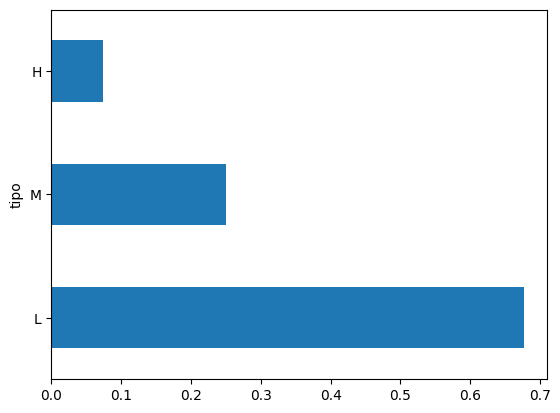

In [38]:
# Verifica a distribuição da variável 'tipo'
print(df['tipo'].value_counts(normalize=True) *100)

# Verifica a distribuição da variável 'tipo'
df['tipo'].value_counts(normalize=True).plot(kind='barh')


<Axes: xlabel='falha_maquina'>

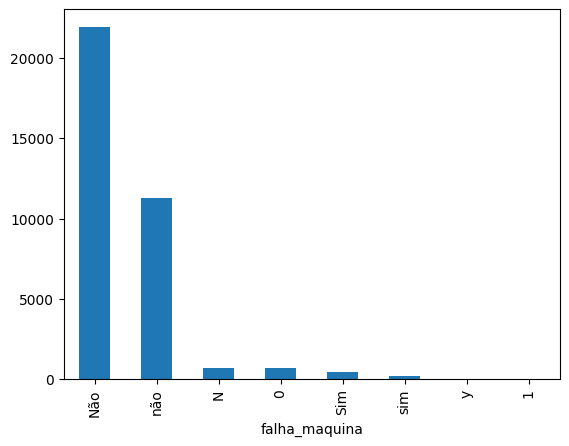

In [34]:
df['falha_maquina'].value_counts().plot(kind='bar')

### Variáveis Alvo - Desbalanceamento de Classes

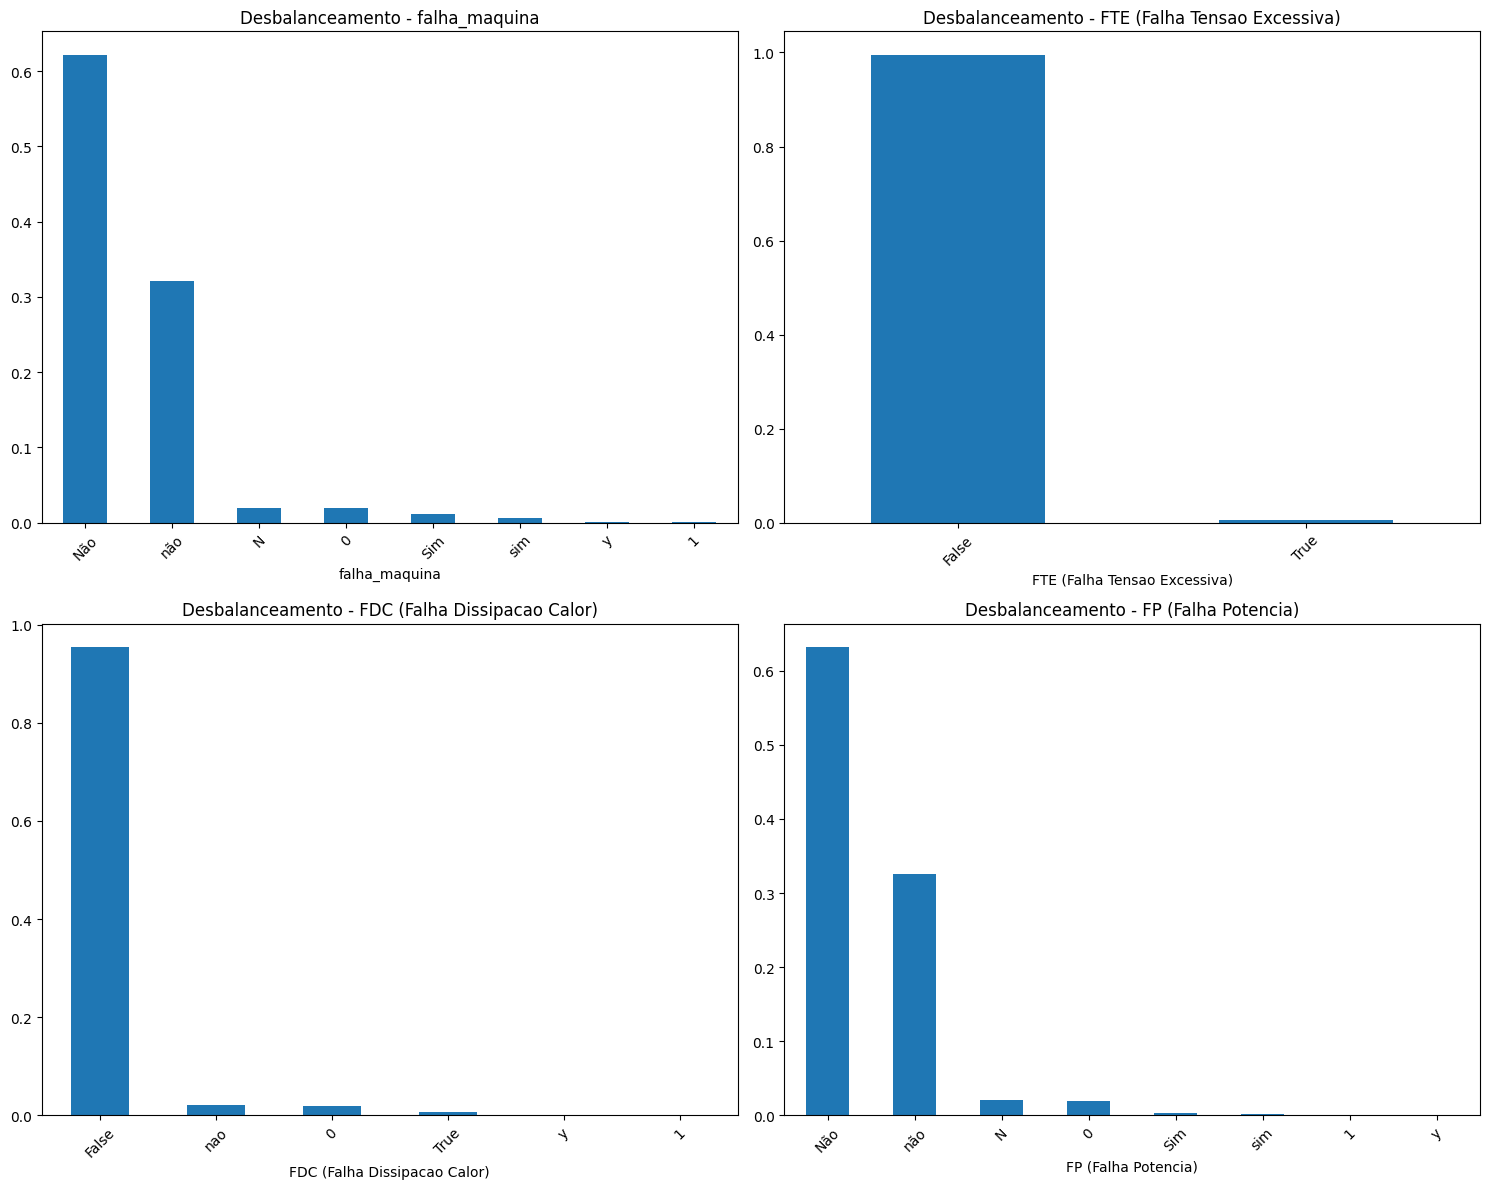

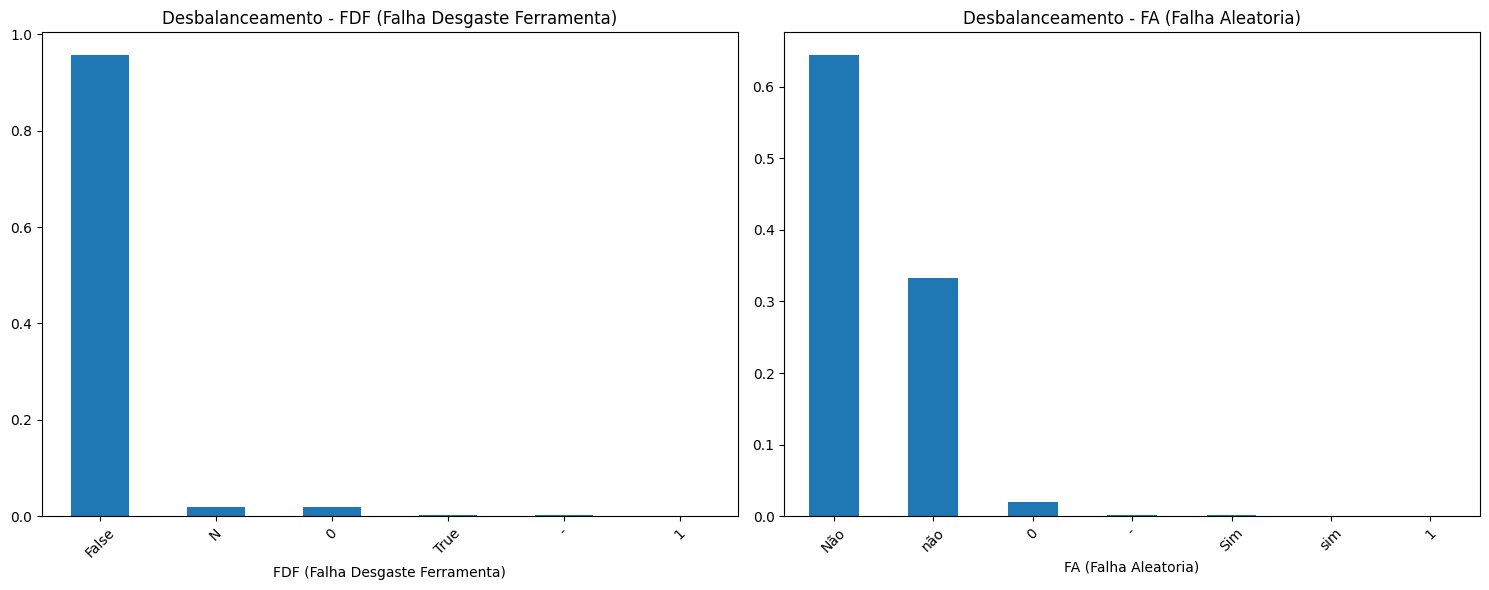

In [36]:

# Verifica Desbalanceamento das Classes da Variável Target
target_cols = ['falha_maquina', 'FTE (Falha Tensao Excessiva)', 'FDC (Falha Dissipacao Calor)', 
               'FP (Falha Potencia)', 'FDF (Falha Desgaste Ferramenta)', 'FA (Falha Aleatoria)']

# Criar figura com subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()  # Transforma matriz 2x2 em array 1D para facilitar iteração

# Plotar os primeiros 4 gráficos em um grid 2x2
for idx, col in enumerate(target_cols[:4]):  # Pegando apenas os 4 primeiros para o layout 2x2
    df[col].value_counts(normalize=True).plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Desbalanceamento - {col}')
    axes[idx].tick_params(axis='x', rotation=45)
    
plt.tight_layout()  
plt.show()

# Criar uma segunda figura para os últimos 2 gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotar os últimos 2 gráficos lado a lado
for idx, col in enumerate(target_cols[4:]):  # Pegando os 2 últimos
    df[col].value_counts(normalize=True).plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Desbalanceamento - {col}')
    axes[idx].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

## 2. Gerando Report Pandas Profiling

In [ ]:
FILE_PATH = "../reports/profile_report_data_understanding.html"

profile = ProfileReport(
    df,
    title="Profiling Report - Manutenção Preditiva (CNC)",
    explorative=False,                 # relatório mais compacto
    minimal=True,                      # desativa seções pesadas automaticamente
    correlations={
        "auto": {
            "pearson": True,
            "spearman": False,
            "kendall": False,
            "phi_k": False,
            "cramers": False
        }
    },
    interactions={"continuous": False},  # desativa matriz de interações
    samples={"head": 0, "tail": 0},     # não incluir amostras
    duplicates={"head": 0}              # não listar duplicatas
)

# Salva HTML estático
profile.to_file(FILE_PATH)

In [ ]:
# visualizar inline
profile.to_notebook_iframe()
print(f"Relatório salvo em: {FILE_PATH}")


## Relatório de Qualidade dos Dados (Data Understanding)

| Categoria                | Variável                     | Problema Identificado                          | Ação (Executada) |
|--------------------------|------------------------------|------------------------------------------------|-----------------|
| **Missing Values**       | `temperatura_ar`             | 616 valores nulos (1.7%)                       | substiuido por mediana   |
|                          | `temperatura_processo`       | 599 valores nulos (1.7%)                       | substiuido por mediana   |
|                          | `velocidade_rotacional`      | 751 valores nulos (2.1%)                       | substiuido por mediana   |
|                          | `torque`                     | 623 valores nulos (1.8%)                       | substiuido por mediana   |
|                          | `desgaste_da_ferramenta`     | 952 valores nulos (2.7%)                       | substiuido por mediana   |
| **Outliers**             | `torque`                     | Valor mínimo atípico (3.8)                     | removido outliers 1.5*Sigma   |
| **Inconsistência Dados** | `temperatura_ar`             | Valor extremo (-36)                            | removido falha de leitura   |
|                          | `temperatura_processo`       | Valor extremo (-38)                            | removido falha de leitura   |
|                          | `velocidade_rotacional`      | Valor extremo (-161)                           | removido falha de leitura   |
|                          | `desgaste_da_ferramenta`      | Valor extremo (-202)                           | removido falha de leitura   |
|                          | `falha_maquina` e subclasses (`FDF`, `FDC`, `FP`, `FTE`, `FA`) | Valores de classes inconsistentes (fora de {0,1}) | Substituir Valores inconsistentes   |
| **Dados Desbalanceados**| `tipo` | Classes (`L`,`M`,`H`) desbalanceadas - Classe Predominante `L`  67.0% | Aplicar Técnica de Balanceamento |
|             | Variáveis Alvos (`falha_maquina`, `FDF`, `FDC`, `FP`, `FTE`, `FA`) | Altamente desbalanceado (95.6%) Classe=0 predominante| Aplicar Técnica de Balanceamento |
